In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

target=pd.read_csv("./train_scores.csv")

In [2]:
target
columns=target.columns

## outlier score들 사이의 상관관계 비교 

In [3]:
target.corr().loc['iforest scores':'mahalanobis scores','iforest scores':'mahalanobis scores']

,iforest scores,lof scores,hdbscan scores,mahalanobis scores
iforest scores,1.000000,0.021752,-0.063415,-0.112965
lof scores,0.021752,1.000000,-0.017610,-0.000004
hdbscan scores,-0.063415,-0.017610,1.000000,0.007447
mahalanobis scores,-0.112965,-0.000004,0.007447,1.000000


## 한 플롯에 비교하기 위해서 스케일링

- 1. 스케일링 된 값의 범위 확인하기

In [5]:
scaler=MinMaxScaler()
target_norm=scaler.fit_transform(target.iloc[:,7:11])
target_norm

array([[8.36138372e-01, 9.99999668e-01, 1.53923871e-02, 7.66578602e-07],
       [1.00000000e+00, 9.99999648e-01, 1.37610492e-02, 1.19210719e-07],
       [1.00000000e+00, 9.99999291e-01, 3.12282546e-03, 1.19210812e-07],
       ...,
       [1.00000000e+00, 9.99999379e-01, 2.38224954e-02, 1.19212746e-07],
       [2.86392742e-01, 9.99999478e-01, 2.03412159e-01, 4.58063634e-05],
       [5.59778460e-01, 9.99903681e-01, 9.96460474e-01, 8.19381633e-06]])

In [6]:
target.iloc[:,7:11]=target_norm

In [7]:
target.describe()

,isFraud,iforest,lof,iforest+lof_u,iforest+lof_i,hdbscan,mahalanobis,iforest scores,lof scores,hdbscan scores,mahalanobis scores
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.0,590540.000000,590540.000000,590540.000000,590540.000000,5.905400e+05
mean,0.034990,0.873282,0.778691,-0.164292,-0.009722,-0.1,-0.013437,0.931590,0.999978,0.107783,5.631730e-05
std,0.183755,0.487215,0.627409,0.370541,0.098118,0.3,0.115136,0.155801,0.002038,0.211977,2.790034e-03
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.946441,0.999999,0.001076,1.191886e-07
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.011929,1.192094e-07
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.095827,1.192290e-07
max,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000e+00


In [37]:
## 모두 lower means oultier로 통일시켜주자

target['hdbscan scores']=1-target['hdbscan scores']
target['mahalanobis scores']=1-target['mahalanobis scores']

In [46]:
target.describe()

,isFraud,iforest,lof,iforest+lof_u,iforest+lof_i,hdbscan,mahalanobis,iforest scores,lof scores,hdbscan scores,mahalanobis scores
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.0,590540.000000,590540.000000,590540.000000,5.905400e+05,590540.000000
mean,0.034990,0.873282,0.778691,-0.164292,-0.009722,-0.1,-0.013437,0.931590,0.999978,8.922166e-01,0.999944
std,0.183755,0.487215,0.627409,0.370541,0.098118,0.3,0.115136,0.155801,0.002038,2.119766e-01,0.002790
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,0.000000,0.000000,1.110223e-16,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.946441,0.999999,9.041728e-01,1.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,9.880714e-01,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,9.989241e-01,1.000000
max,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000e+00,1.000000


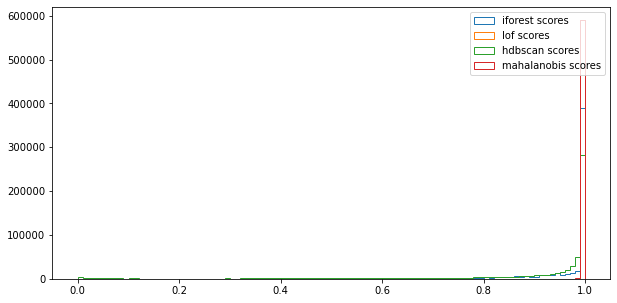

In [42]:
methods=['iforest','lof','hdbscan','mahalanobis']
methods_score=[i+" scores" for i in methods]

fig=plt.figure(figsize=(10,5))
for i in methods_score:
    plt.hist(target[i],bins=100,histtype='step',label=i)
plt.legend()
plt.show()

hdbscan같은 경우 값이 너무 넓게 분포하고 있는 것으로 보임 

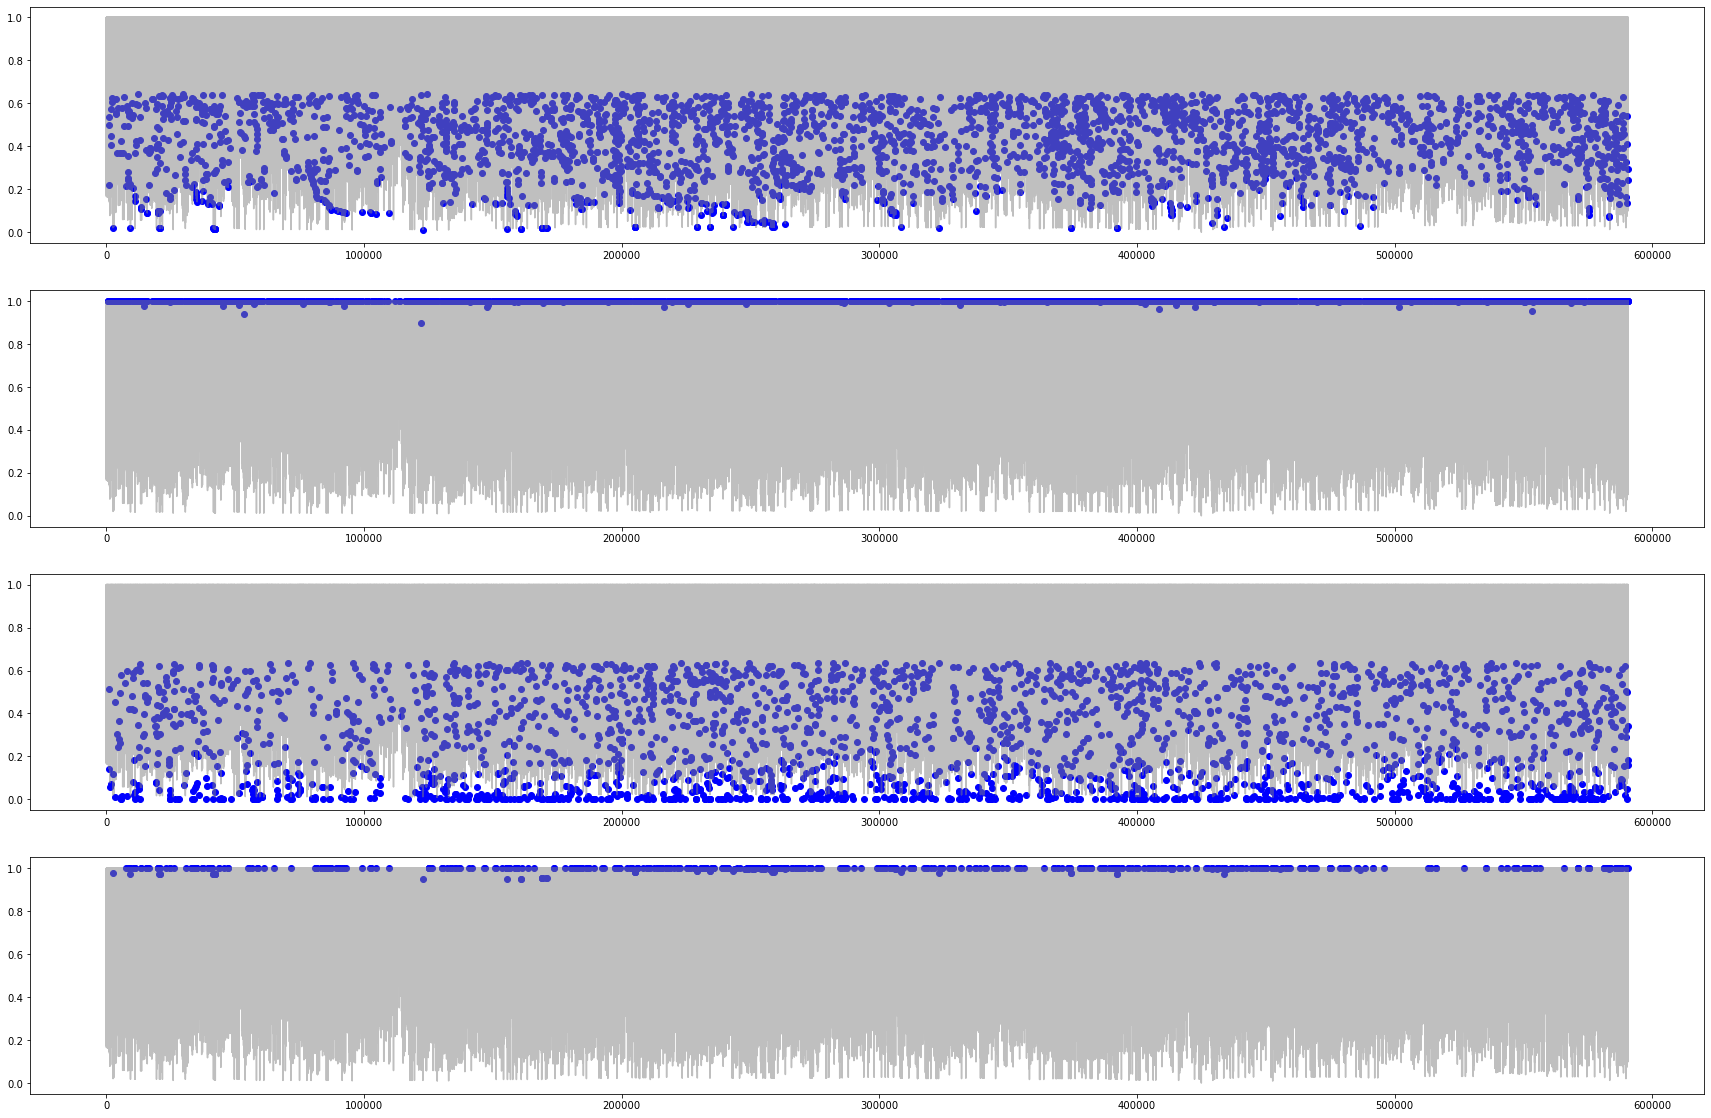

In [45]:
fig,axes=plt.subplots(4,figsize=(30,20))
methods=['iforest','lof','hdbscan','mahalanobis']
for i in range(4):
    axes[i].plot(target[['iforest scores']],color='grey',alpha=0.5)
    axes[i].scatter(target.loc[(target['isFraud']==1) & (target[methods[i]]==-1)].index,
                    target.loc[(target['isFraud']==1) & (target[methods[i]]==-1),[methods[i]+' scores']],color='blue')

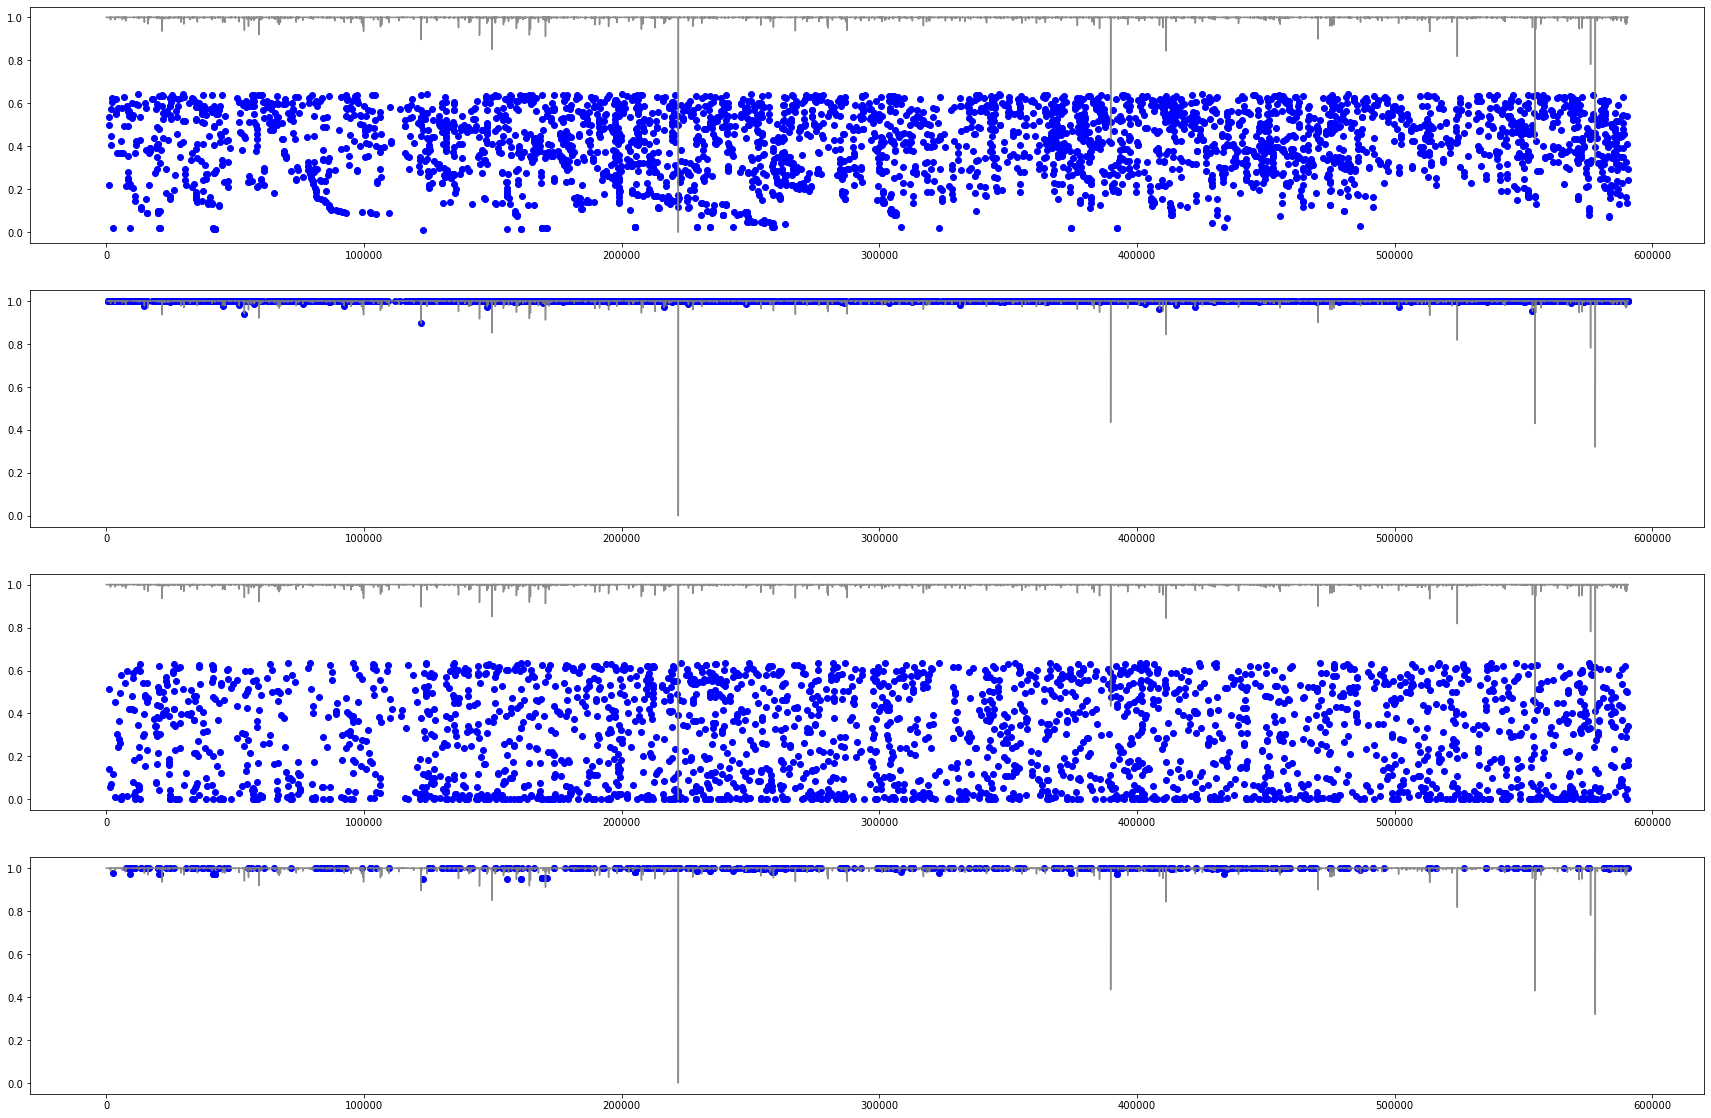

In [49]:
fig,axes=plt.subplots(4,figsize=(30,20))
methods=['iforest','lof','hdbscan','mahalanobis']
for i in range(4):
    axes[i].plot(target[['lof scores']],color='grey',alpha=0.9)
    axes[i].scatter(target.loc[(target['isFraud']==1) & (target[methods[i]]==-1)].index,
                    target.loc[(target['isFraud']==1) & (target[methods[i]]==-1),[methods[i]+' scores']],color='blue')

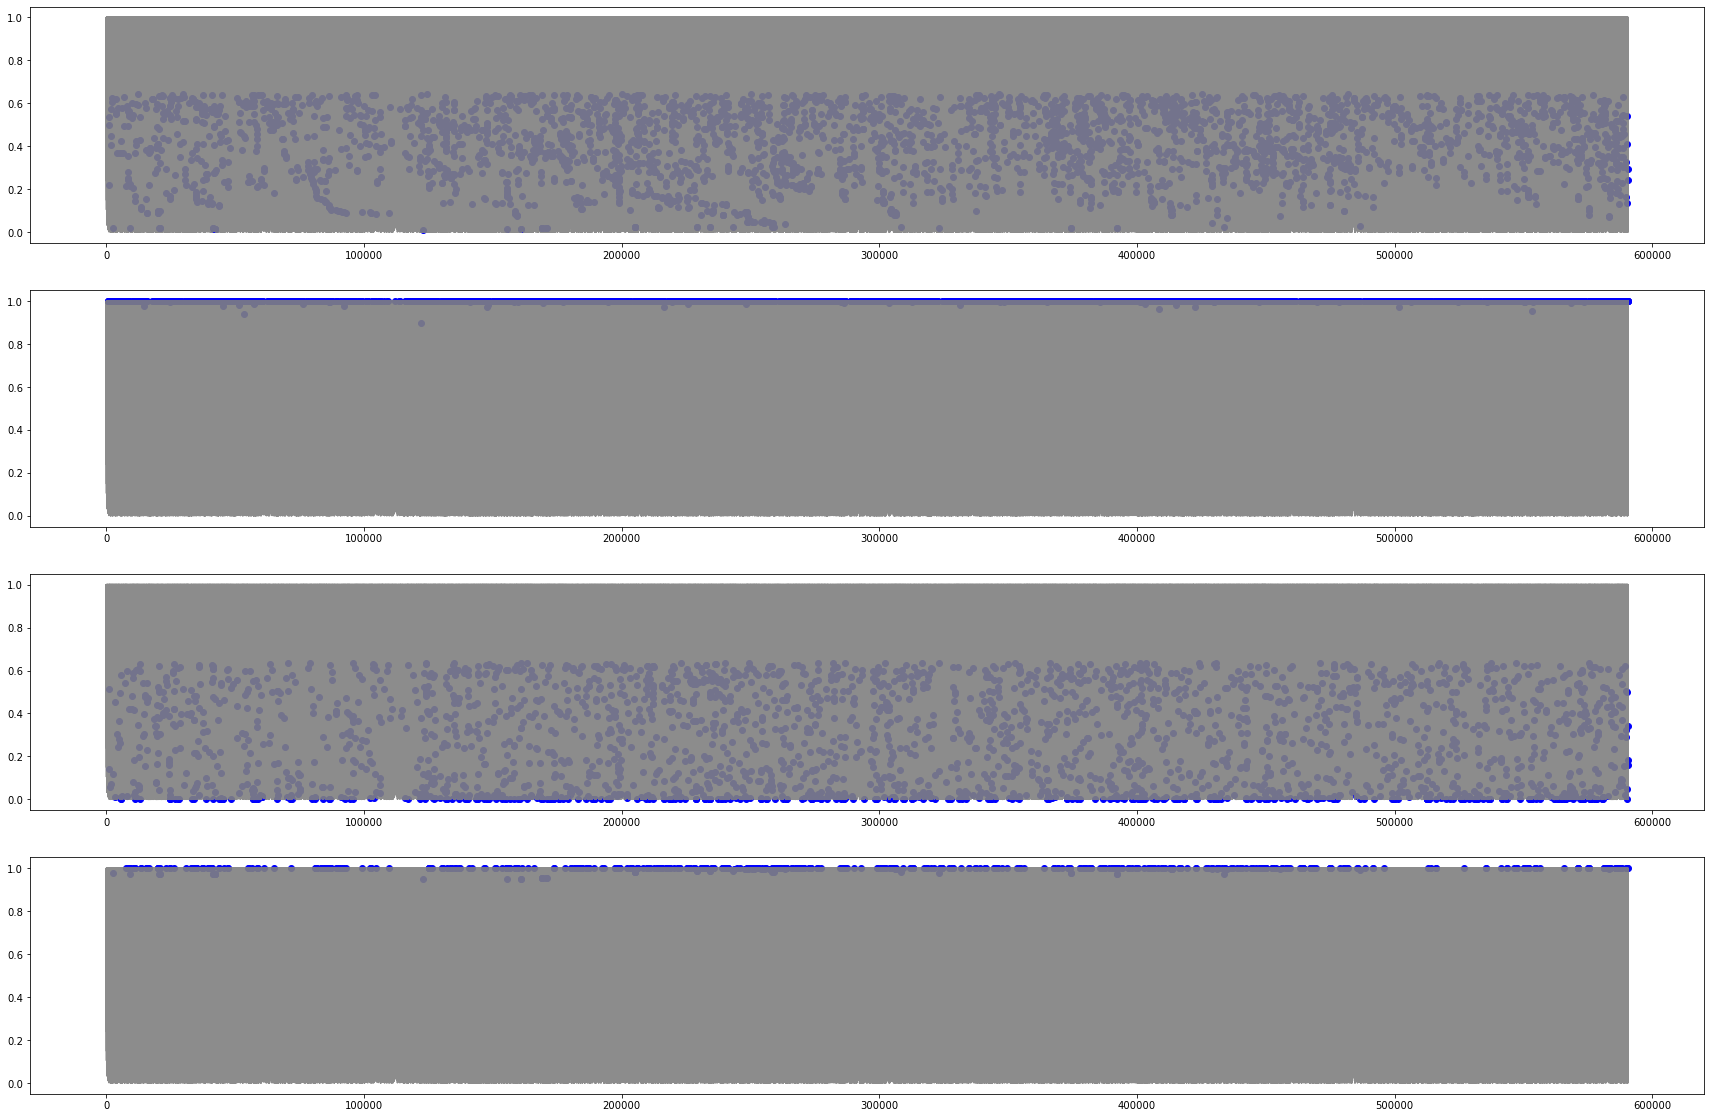

In [53]:
fig,axes=plt.subplots(4,figsize=(30,20))
methods=['iforest','lof','hdbscan','mahalanobis']
for i in range(4):
    axes[i].plot(target[['hdbscan scores']],color='grey',alpha=0.9)
    axes[i].scatter(target.loc[(target['isFraud']==1) & (target[methods[i]]==-1)].index,
                    target.loc[(target['isFraud']==1) & (target[methods[i]]==-1),[methods[i]+' scores']],color='blue')

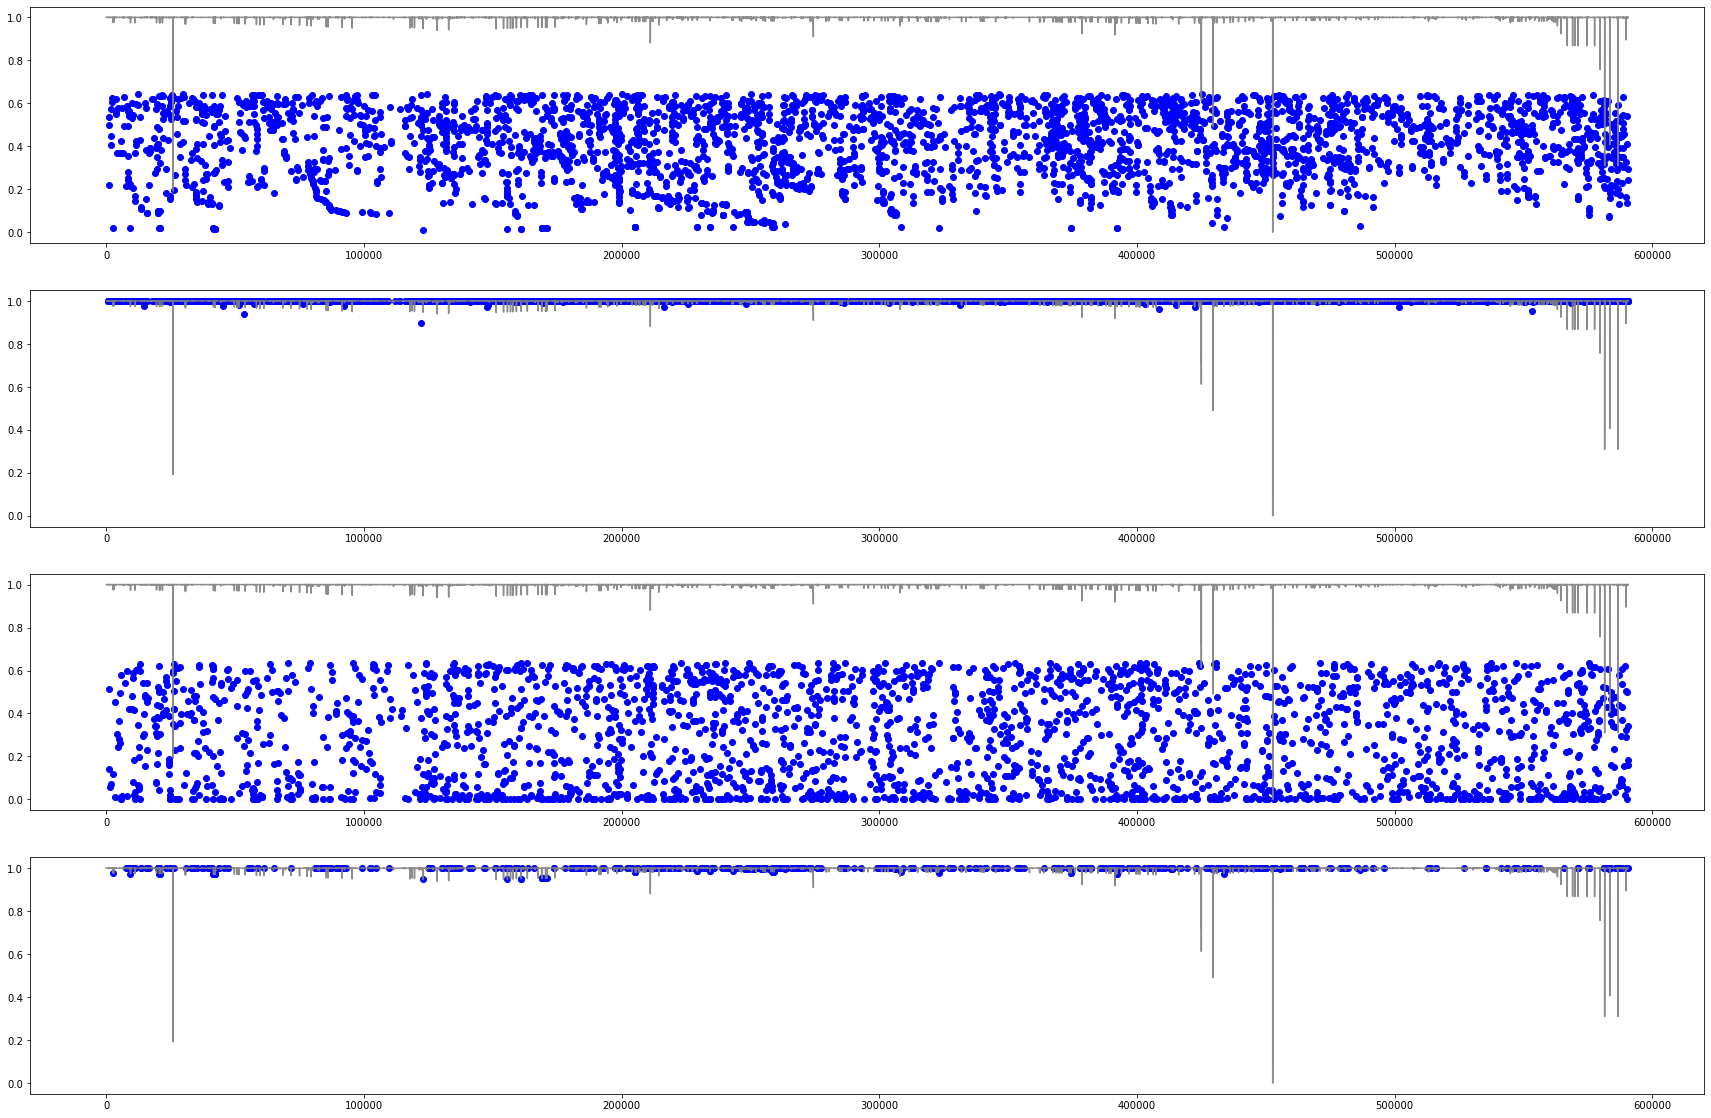

In [54]:
fig,axes=plt.subplots(4,figsize=(30,20))
methods=['iforest','lof','hdbscan','mahalanobis']
for i in range(4):
    axes[i].plot(target[['mahalanobis scores']],color='grey',alpha=0.9)
    axes[i].scatter(target.loc[(target['isFraud']==1) & (target[methods[i]]==-1)].index,
                    target.loc[(target['isFraud']==1) & (target[methods[i]]==-1),[methods[i]+' scores']],color='blue')

## 

결과적으로 lof,mahalanobis가 비슷한 값의 범위를 가지고,  
iforest, hdbscan이 비슷한 값의 범위를 가짐  

따라서 lof와 mahalanobis의 범위를 iforest와 유사하게 바꿀 필요성이 있어 보임  

